# Loan Approval Prediction Model

### Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

### Import Dataset


In [13]:
df=pd.read_csv('loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Information About Dataset

In [14]:
df.shape

(614, 13)

In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [18]:
df.select_dtypes(include=['object']).nunique()

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64

In [64]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Exploratory Data Analysis (EDA)

C:\Users\hp\AppData\Local\Temp\ipykernel_19344\2506496174.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Loan_Status'], palette='Set2')


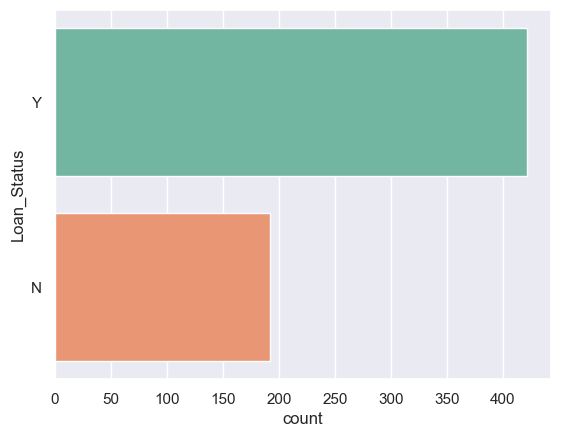

In [20]:
sns.countplot(df['Loan_Status'], palette='Set2')
plt.show()

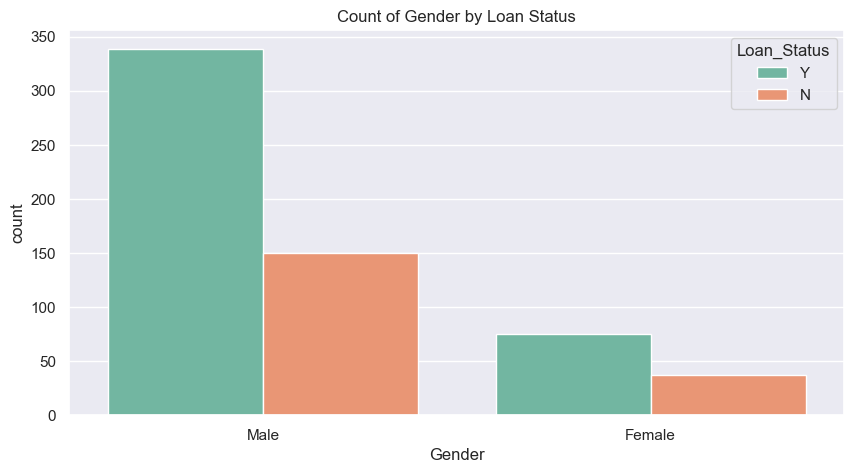

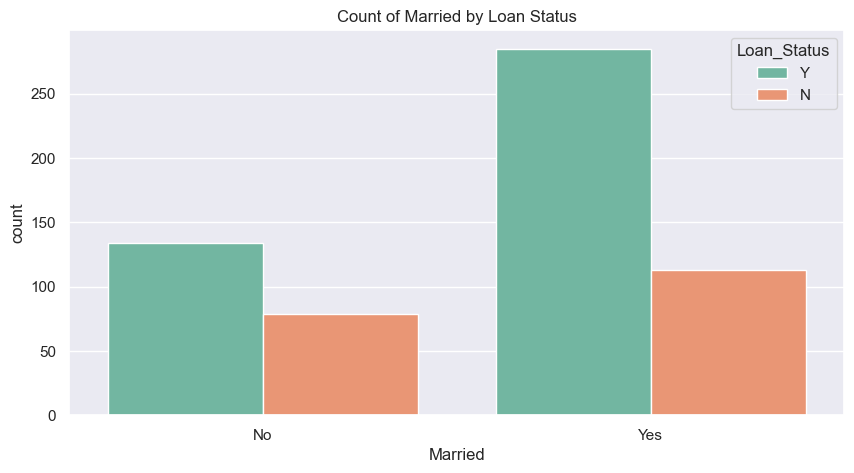

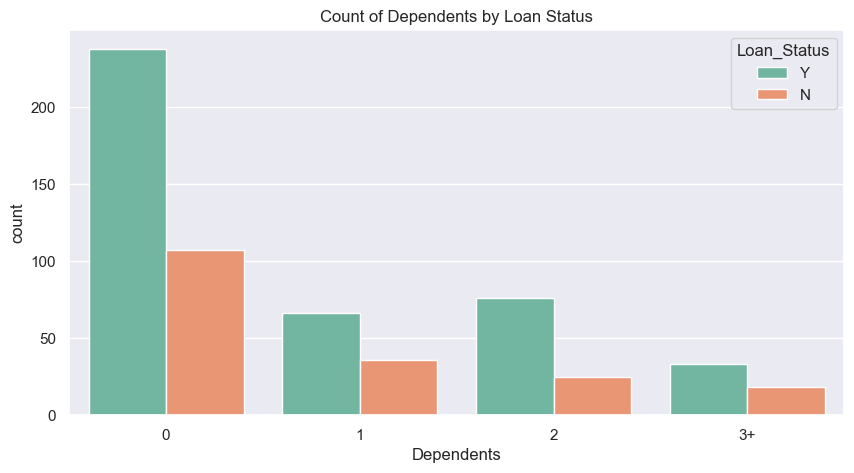

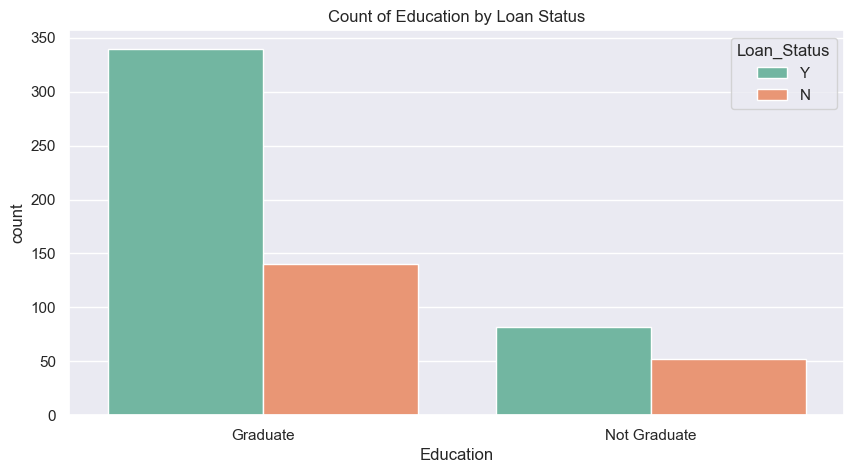

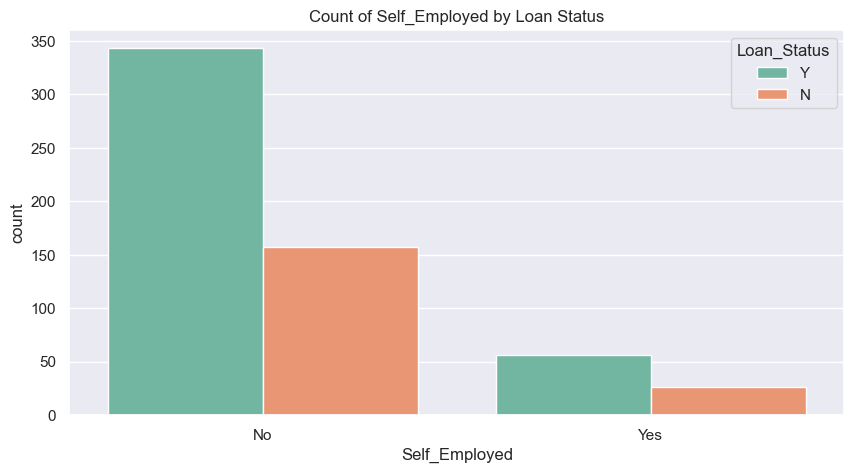

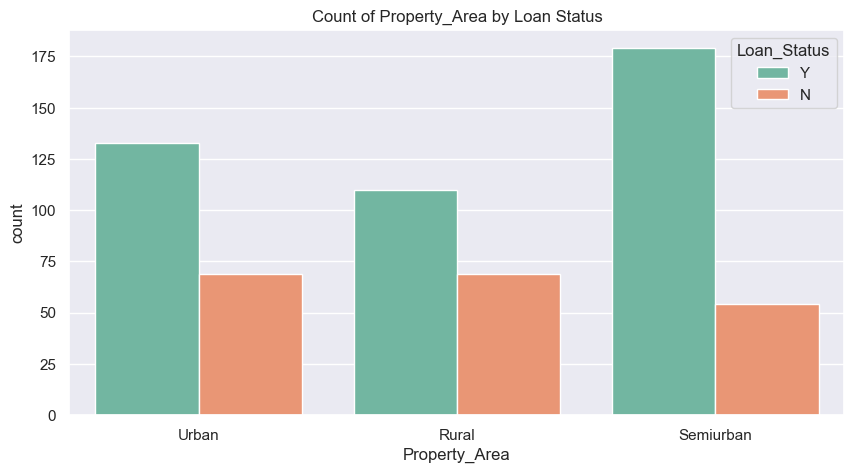

In [21]:
cat=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area' ]
for i in cat:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df,x=i, hue='Loan_Status', palette='Set2')
    plt.title(f'Count of {i} by Loan Status')
plt.show()

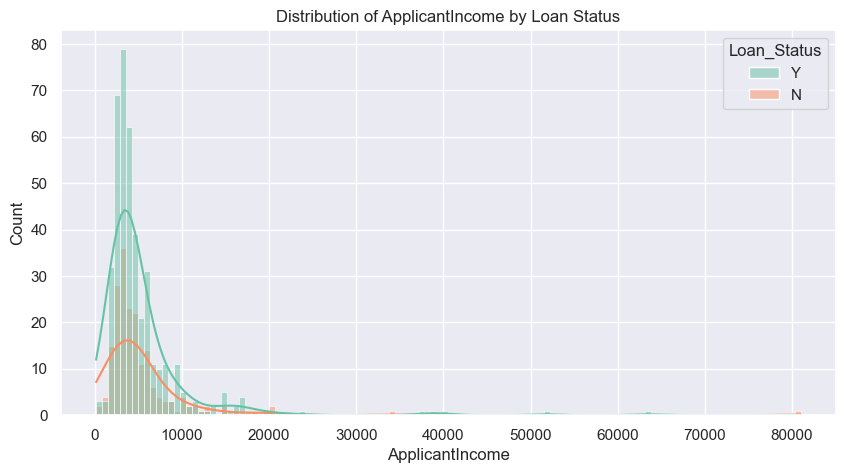

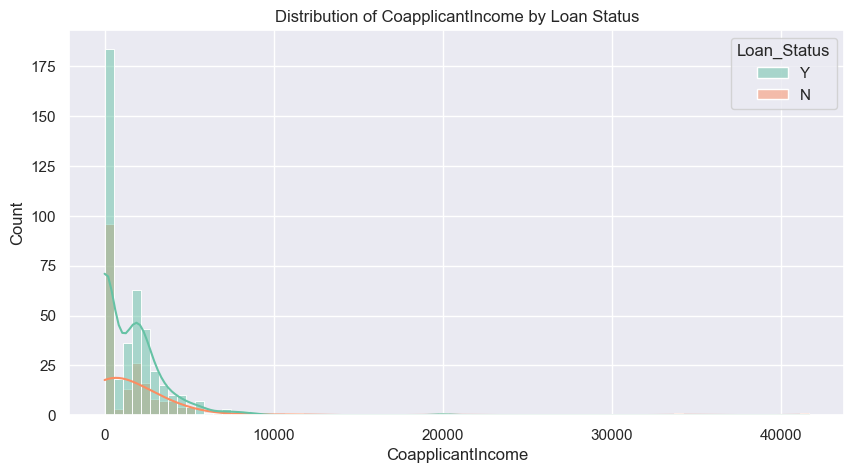

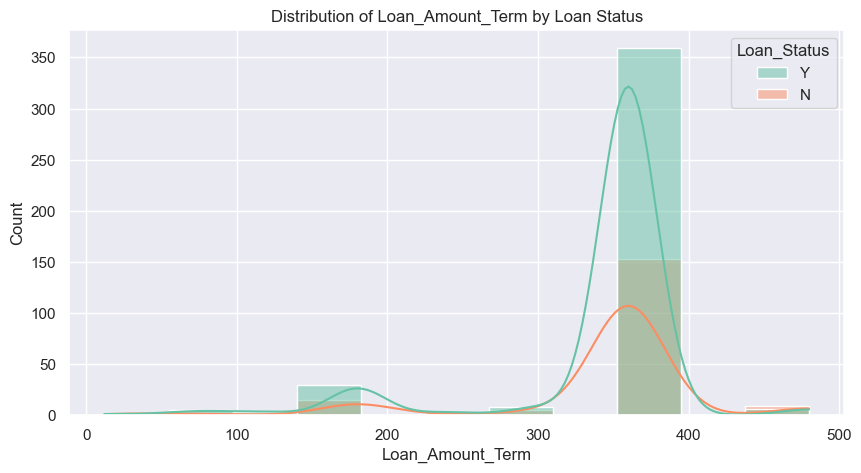

In [22]:
num=['ApplicantIncome', 'CoapplicantIncome','Loan_Amount_Term']
for i in num:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=i, hue='Loan_Status', kde=True, palette='Set2')
    plt.title(f'Distribution of {i} by Loan Status')
    plt.xlabel(i)
    plt.ylabel('Count')

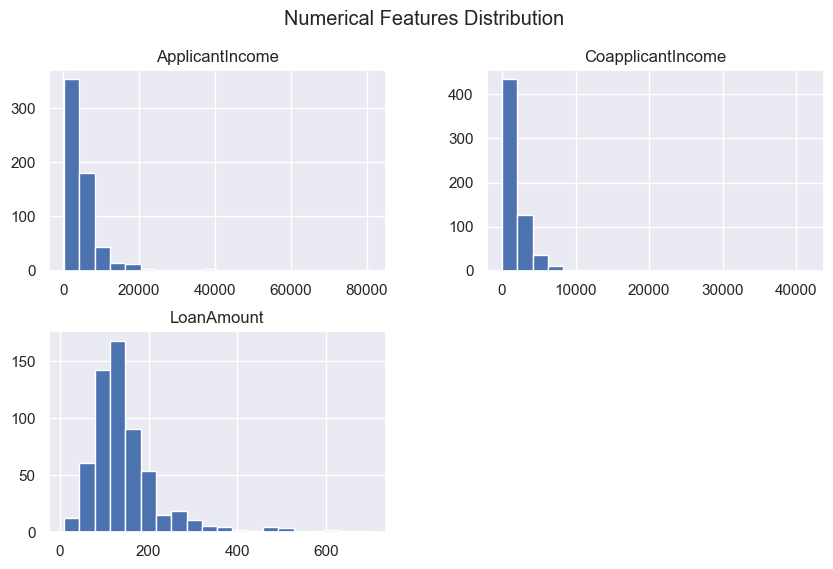

In [23]:
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].hist(bins=20, figsize=(10, 6))
plt.suptitle("Numerical Features Distribution")
plt.show()

### Data Preprocessing

In [24]:
df=df.drop(['Loan_ID'], axis=1)

In [25]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Credit_History      8.143322
Self_Employed       5.211726
LoanAmount          3.583062
Dependents          2.442997
Loan_Amount_Term    2.280130
Gender              2.117264
Married             0.488599
dtype: float64

In [26]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [27]:
df=df.fillna('Unknown')

In [28]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    object 
 9   Credit_History     614 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 57.7+ KB


### Lalbel Encoding

In [30]:
for i in df.select_dtypes(include=['object']).columns:
    print(f"{i} : {df[i].unique()}")

Gender : ['Male' 'Female' 'Unknown']
Married : ['No' 'Yes' 'Unknown']
Dependents : ['0' '1' '2' '3+' 'Unknown']
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes' 'Unknown']
Loan_Amount_Term : [360.0 120.0 240.0 'Unknown' 180.0 60.0 300.0 480.0 36.0 84.0 12.0]
Credit_History : [1.0 0.0 'Unknown']
Property_Area : ['Urban' 'Rural' 'Semiurban']
Loan_Status : ['Y' 'N']


In [31]:
df[['Loan_Amount_Term','Credit_History']] = df[['Loan_Amount_Term','Credit_History']].astype(str)

In [32]:
from sklearn import preprocessing

In [33]:
for col in df.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    print(f"{col}: {df[col].unique()}")

Gender: [1 0 2]
Married: [0 2 1]
Dependents: [0 1 2 3 4]
Education: [0 1]
Self_Employed: [0 2 1]
Loan_Amount_Term: [ 6  1  3 10  2  8  4  7  5  9  0]
Credit_History: [1 0 2]
Property_Area: [2 0 1]
Loan_Status: [1 0]


### Check if Loan_Status is balanced

C:\Users\hp\AppData\Local\Temp\ipykernel_19344\1099983558.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Loan_Status'], palette='Set2')


Text(0, 0.5, 'Count')

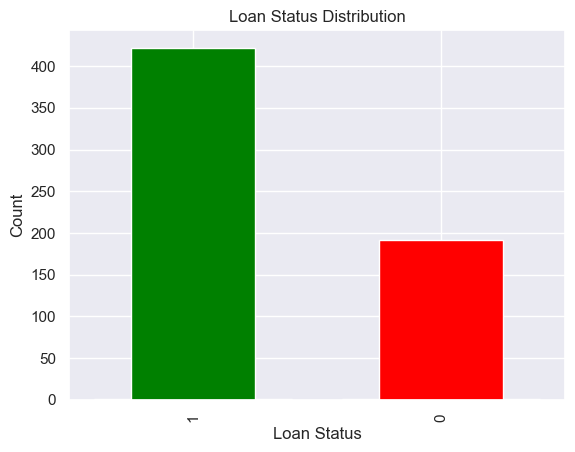

In [34]:
sns.countplot(df['Loan_Status'], palette='Set2')
df['Loan_Status'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')

In [35]:
from sklearn.utils import resample
df_majority = df[(df['Loan_Status']==1)]
df_minority = df[(df['Loan_Status']==0)]
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples= 422,
                                 random_state=0)
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [36]:
df_upsampled['Loan_Status'].value_counts()

Loan_Status
0    422
1    422
Name: count, dtype: int64

In [37]:
df_upsampled.shape

(844, 12)

## Split Data into Features and Target Variable

In [38]:
x= df_upsampled.drop(['Loan_Status'], axis=1)
y= df_upsampled['Loan_Status']

In [39]:
x.shape, y.shape

((844, 11), (844,))

### Detect and Remove Outliers

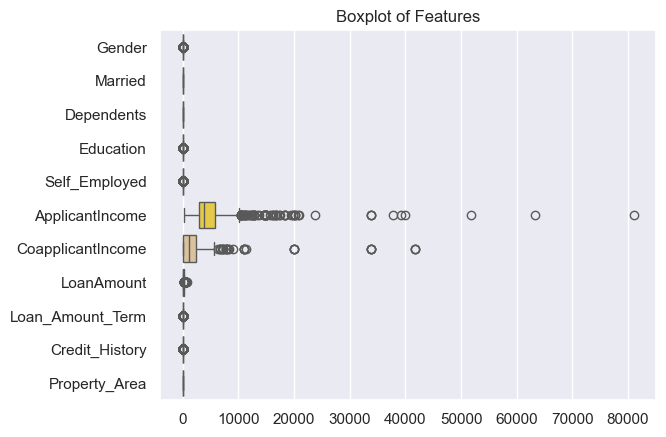

In [40]:
sns.boxplot(data=x, orient='h', palette='Set2')
plt.title('Boxplot of Features')
plt.show()

In [41]:
column_names = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']

# remove outliers for each selected column using the IQR method
for column_name in column_names:
    Q1 = df_upsampled[column_name].quantile(0.25)
    Q3 = df_upsampled[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df_upsampled = df_upsampled[~((df_upsampled[column_name] < (Q1 - 1.5 * IQR)) | (df_upsampled[column_name] > (Q3 + 1.5 * IQR)))]

df_upsampled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
148,0,0,0,0,0,10000,1666.0,225.000000,6,1,0,0
338,0,0,3,1,0,1830,0.0,146.412162,6,0,2,0
24,1,2,1,0,1,3717,2925.0,151.000000,6,2,1,0
57,1,2,0,0,0,3366,2200.0,135.000000,6,1,0,0
107,1,0,0,1,1,7333,0.0,120.000000,6,1,0,0


In [42]:
df_upsampled.shape

(614, 12)

<Axes: >

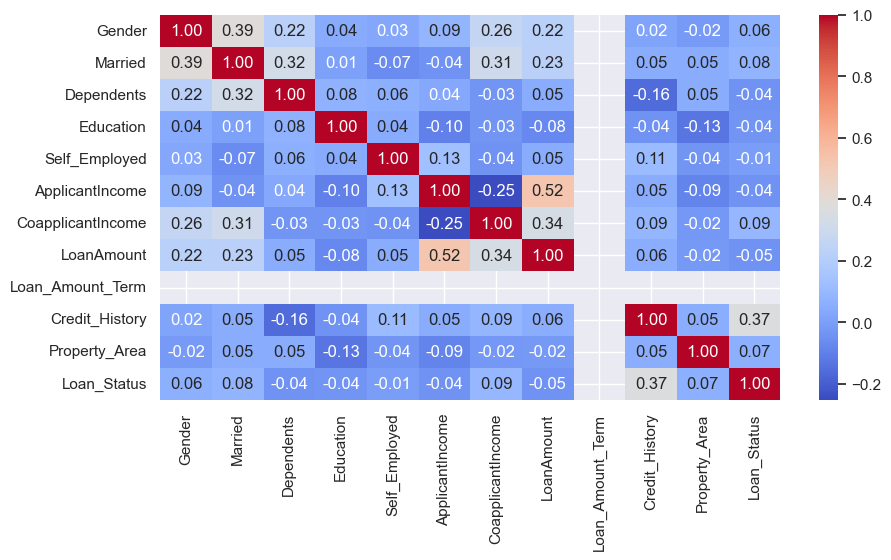

In [43]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_upsampled.corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [44]:
df_upsampled=df_upsampled.drop('Loan_Amount_Term', axis=1)

### Splitting the Data into Training and Testing Sets

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

### Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [63]:
dtree= DecisionTreeClassifier()
param={
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,4,5,6,7,8,9,10, 15, 20],
    'min_samples_split': [2,3,4, 5, 10],
    'min_samples_leaf': [1, 2,3, 4]
}
grid_search = GridSearchCV(estimator=dtree, param_grid=param, cv=5)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [49]:
dtree= DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=1, min_samples_split=2)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

In [50]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [51]:
y_pred = dtree.predict(x_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 86.39 %


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        85
           1       0.90      0.82      0.86        84

    accuracy                           0.86       169
   macro avg       0.87      0.86      0.86       169
weighted avg       0.87      0.86      0.86       169



C:\Users\hp\AppData\Local\Temp\ipykernel_19344\2587862172.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi2, x='Importance', y='Feature Name', palette='Set2')


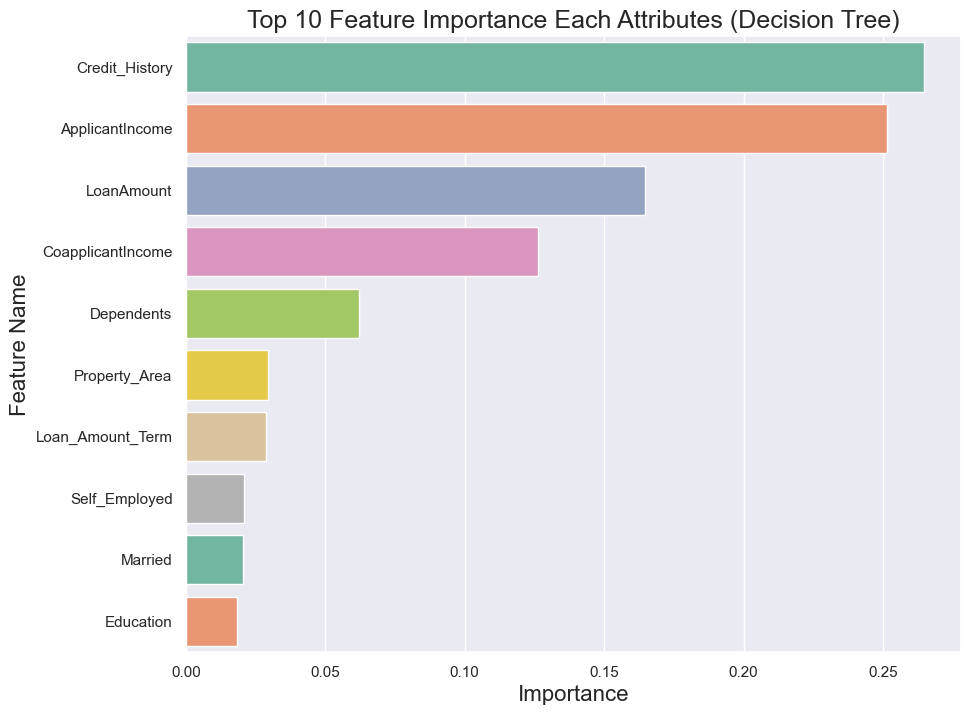

In [53]:
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name', palette='Set2')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

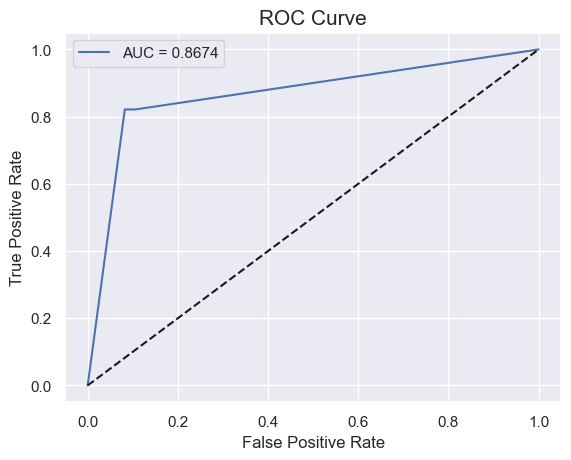

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

## Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
param={
    'n_estimators': [100, 200, 300],
    'max_depth': [5,6,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,3, 4]
}
grid_search = GridSearchCV(estimator=rfc, param_grid=param, cv=5)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [56]:
rfc= RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=1, min_samples_split=2)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)


In [57]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [58]:
print(accuracy_score(y_test, y_pred)*100, "%")

90.53254437869822 %


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        85
           1       0.90      0.92      0.91        84

    accuracy                           0.91       169
   macro avg       0.91      0.91      0.91       169
weighted avg       0.91      0.91      0.91       169



C:\Users\hp\AppData\Local\Temp\ipykernel_19344\1593419799.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi2, x='Importance', y='Feature Name', palette='Set2')


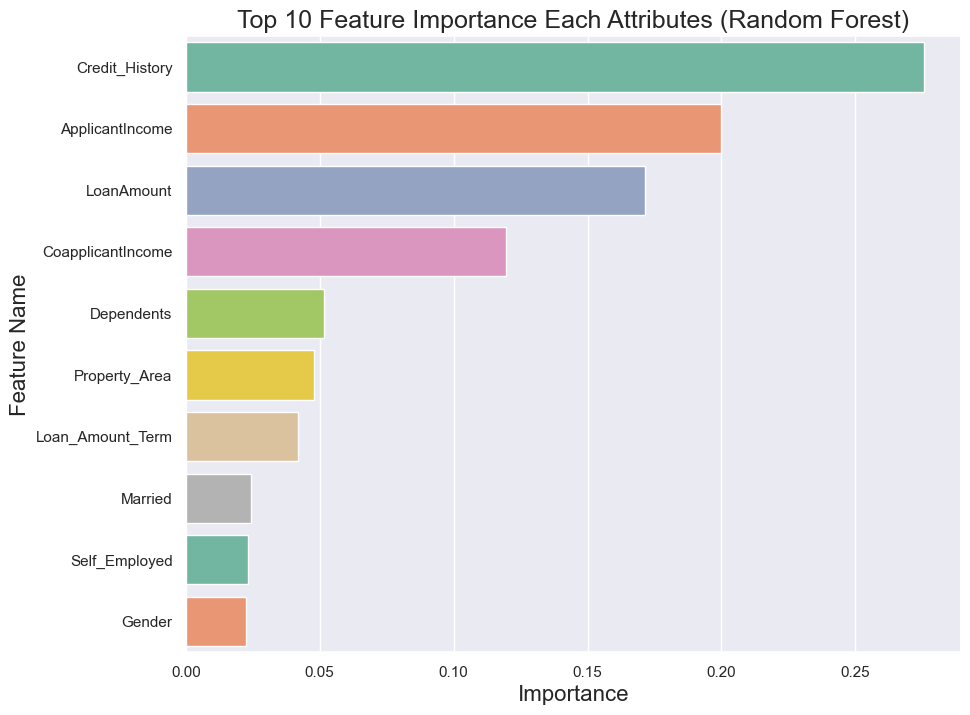

In [60]:
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name', palette='Set2')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

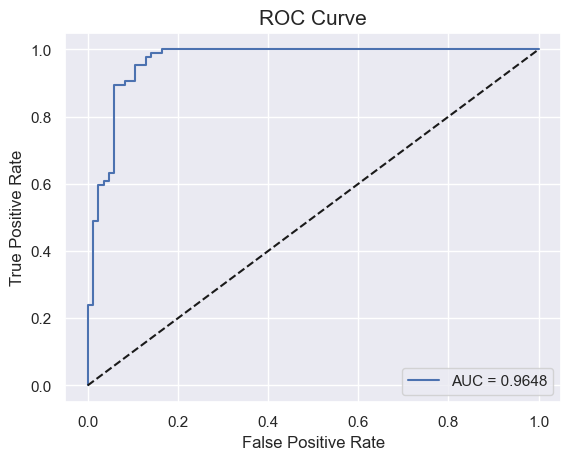

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [66]:
import pickle
with open('loan_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)